In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/cnn_dataset.zip -d data

Archive:  /content/drive/MyDrive/cnn_dataset.zip
replace data/cnn_dataset/test/capless/frame_0002_bottle_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
train_dir = '/content/data/cnn_dataset/train'
test_dir = '/content/data/cnn_dataset/test'


In [14]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)


In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Class indices:", train_generator.class_indices)

Found 2312 images belonging to 5 classes.
Found 580 images belonging to 5 classes.
Class indices: {'capless': 0, 'good': 1, 'old': 2, 'othertype': 3, 'shape': 4}


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("bottle_defect_classifier.h5", save_best_only=True)

In [20]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, model_checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.4164 - loss: 1.4431

73/73 ━━━━━━━━━━━━━━━━━━━━ 66s 740ms/step - accuracy: 0.4184 - loss: 1.4390 - val_accuracy: 0.8931 - val_loss: 0.5338
Epoch 2/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.7788 - loss: 0.6249

73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 568ms/step - accuracy: 0.7795 - loss: 0.6236 - val_accuracy: 0.9414 - val_loss: 0.2929
Epoch 3/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.8868 - loss: 0.3551

73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 557ms/step - accuracy: 0.8869 - loss: 0.3548 - val_accuracy: 0.9638 - val_loss: 0.1958
Epoch 4/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.9312 - loss: 0.2427

73/73 ━━━━━━━━━━━━━━━━━━━━ 51s 702ms/step - accuracy: 0.9313 - loss: 0.2425 - val_accuracy: 0.9655 - val_loss: 0.1537
Epoch 5/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.9567 - loss: 0.1781

73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 549ms/step - accuracy: 0.9567 - loss: 0.1781 - val_accuracy: 0.9690 - val_loss: 0.1386
Epoch 6/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.9469 - loss: 0.1620

73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - accuracy: 0.9470 - loss: 0.1618 - val_accuracy: 0.9759 - val_loss: 0.1118
Epoch 7/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.9644 - loss: 0.1257

73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 562ms/step - accuracy: 0.9644 - loss: 0.1257 - val_accuracy: 0.9759 - val_loss: 0.0955
Epoch 8/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9746 - loss: 0.1104

73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 561ms/step - accuracy: 0.9746 - loss: 0.1103 - val_accuracy: 0.9810 - val_loss: 0.0878
Epoch 9/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.9794 - loss: 0.0828 - val_accuracy: 0.9776 - val_loss: 0.0893
Epoch 10/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9707 - loss: 0.0879

73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 552ms/step - accuracy: 0.9708 - loss: 0.0878 - val_accuracy: 0.9776 - val_loss: 0.0804
Epoch 11/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 545ms/step - accuracy: 0.9831 - loss: 0.0736 - val_accuracy: 0.9776 - val_loss: 0.0825
Epoch 12/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.9816 - loss: 0.0706

73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - accuracy: 0.9816 - loss: 0.0706 - val_accuracy: 0.9828 - val_loss: 0.0695
Epoch 13/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 540ms/step - accuracy: 0.9837 - loss: 0.0598 - val_accuracy: 0.9776 - val_loss: 0.0764
Epoch 14/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.9863 - loss: 0.0572

73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 568ms/step - accuracy: 0.9863 - loss: 0.0572 - val_accuracy: 0.9776 - val_loss: 0.0661
Epoch 15/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.9802 - loss: 0.0579

73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 548ms/step - accuracy: 0.9802 - loss: 0.0579 - val_accuracy: 0.9845 - val_loss: 0.0546


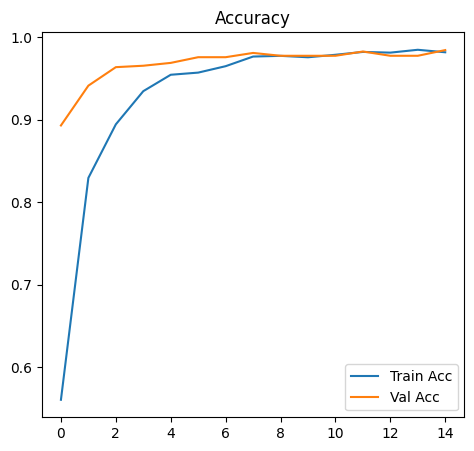

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

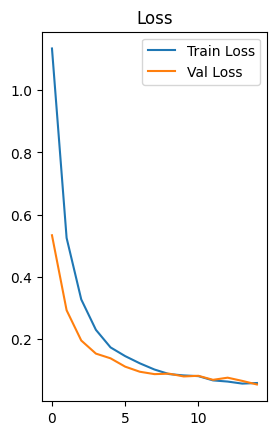

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

Found 580 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step
Classification Report:
              precision    recall  f1-score   support

     capless       0.99      0.97      0.98       148
        good       0.96      0.97      0.97       137
         old       0.97      1.00      0.99       114
   othertype       1.00      1.00      1.00       132
       shape       1.00      1.00      1.00        49

    accuracy                           0.98       580
   macro avg       0.99      0.99      0.99       580
weighted avg       0.98      0.98      0.98       580



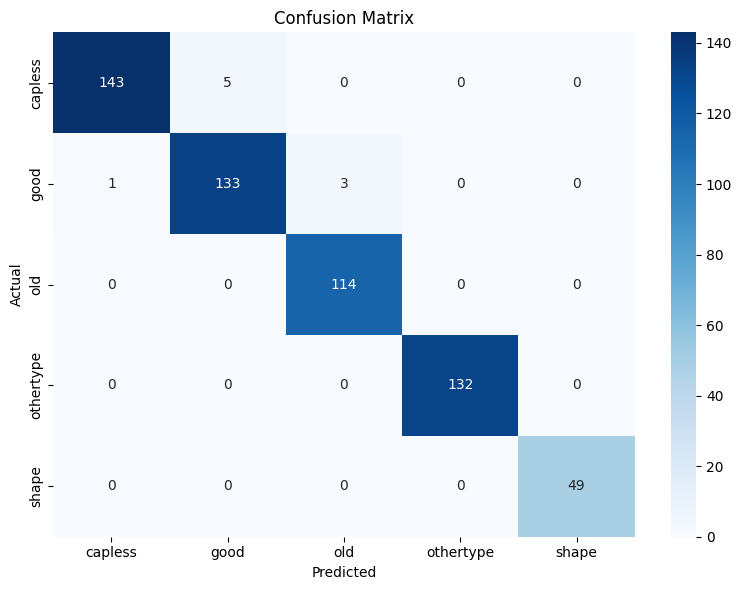

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = load_model('bottle_defect_classifier.h5')


IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/data/cnn_dataset/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


class_labels = list(test_generator.class_indices.keys())


print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Found 580 images belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


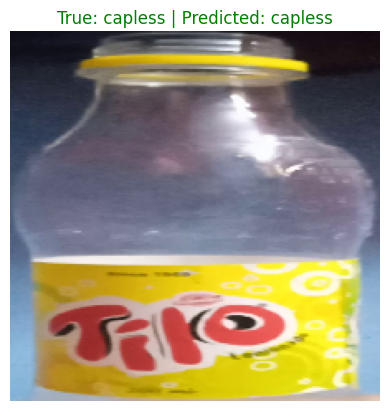

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


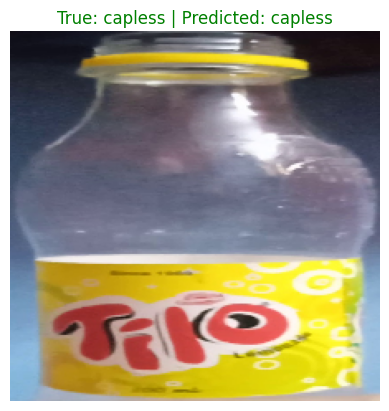

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


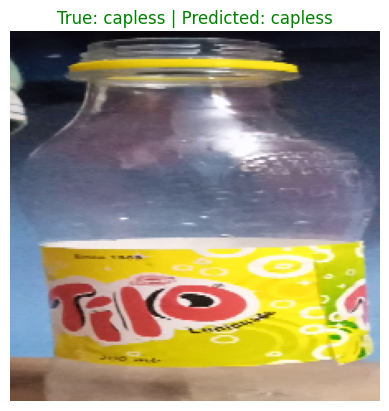

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


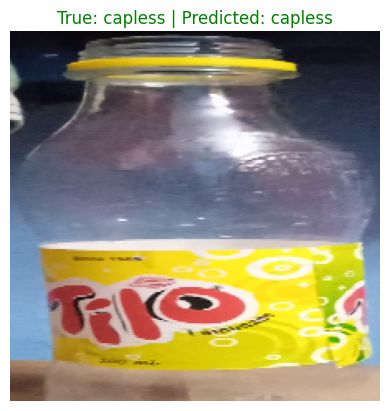

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


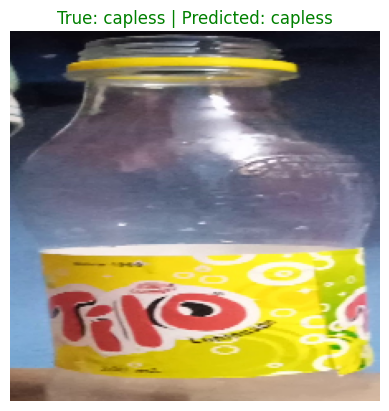

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


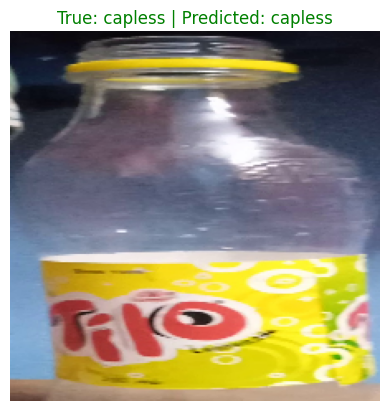

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


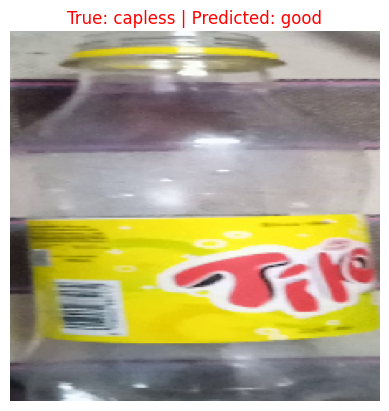

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


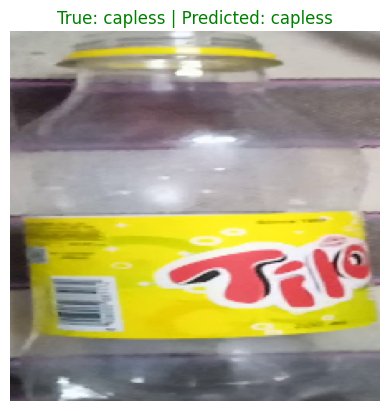

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


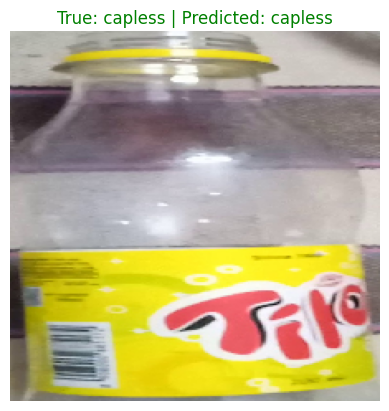

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


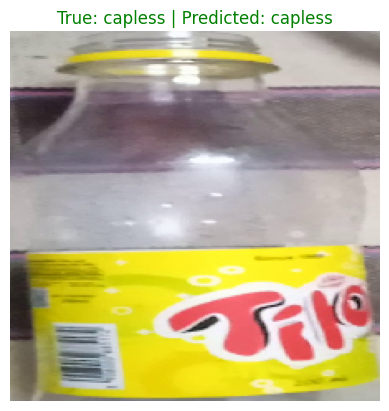

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os


model = load_model('bottle_defect_classifier.h5')

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 1

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/data/cnn_dataset/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

class_indices = test_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}

num_images_to_display = 10 

for i in range(num_images_to_display):
    x, y_true = test_generator[i]
    prediction = model.predict(x)
    predicted_class_index = np.argmax(prediction)
    true_class_index = np.argmax(y_true)

    predicted_label = inv_class_indices[predicted_class_index]
    true_label = inv_class_indices[true_class_index]

 
    plt.imshow(x[0])
    plt.axis('off')
    plt.title(f'True: {true_label} | Predicted: {predicted_label}',
              color='green' if predicted_label == true_label else 'red')
    plt.show()
